In [1]:
import os
os.chdir("D:\IIT Kanpur\Time Series Project")
os.getcwd()

'D:\\IIT Kanpur\\Time Series Project'

In [2]:
import pandas as pd
nifty_df = pd.read_excel("Nf50_Data2.xlsx")
nifty_df.head()
#isinstance(nifty_df, pd.DataFrame)

,Time,Open,High,Low,Close
0,2016-01-01,7938.45,7972.55,7909.80,7963.2
1,2016-01-04,7924.55,7937.55,7781.10,7791.3
2,2016-01-05,7828.40,7831.20,7763.25,7784.6
3,2016-01-06,7788.05,7800.95,7721.20,7741.0
4,2016-01-07,7673.35,7674.95,7556.60,7568.3


In [3]:
yt_obs = nifty_df["Close"]
yt_obs

0       7963.20
1       7791.30
2       7784.60
3       7741.00
4       7568.30
         ...   
798    11354.25
799    11483.25
800    11445.05
801    11570.00
802    11623.90
Name: Close, Length: 803, dtype: float64

In [4]:
len(yt_obs)
import numpy as np
x = np.arange(len(yt_obs)) + 1
x
nifty_df['x'] = x
nifty_df.head()
nifty_df.drop(nifty_df.columns[[1,2,3]],axis = 1, inplace=True)
nifty_df.head()

,Time,Close,x
0,2016-01-01,7963.2,1
1,2016-01-04,7791.3,2
2,2016-01-05,7784.6,3
3,2016-01-06,7741.0,4
4,2016-01-07,7568.3,5


In [5]:
nifty_time = nifty_df.set_index("Time")
nifty_time

,Close,x
Time,,
2016-01-01,7963.20,1
2016-01-04,7791.30,2
2016-01-05,7784.60,3
2016-01-06,7741.00,4
2016-01-07,7568.30,5
...,...,...
2019-03-25,11354.25,799
2019-03-26,11483.25,800
2019-03-27,11445.05,801


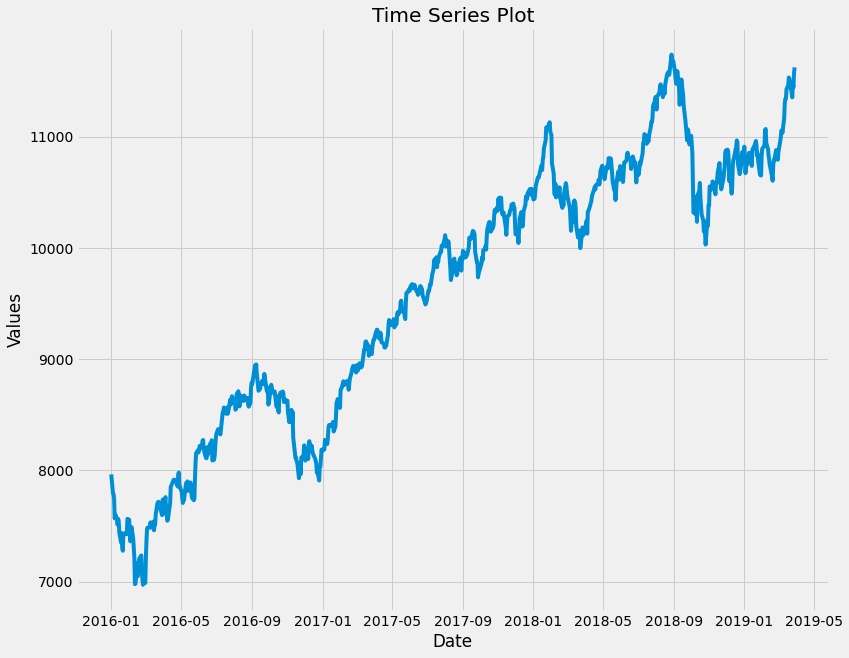

In [6]:
import matplotlib.pyplot as plt
 
# Using a inbuilt style to change
# the look and feel of the plot
plt.style.use("fivethirtyeight")
 
# setting figure size to 12, 10
plt.figure(figsize=(12, 10))
 
# Labelling the axes and setting
# a title
plt.xlabel("Date")
plt.ylabel("Values")
plt.title("Time Series Plot")
 

plt.plot(nifty_time["Close"])

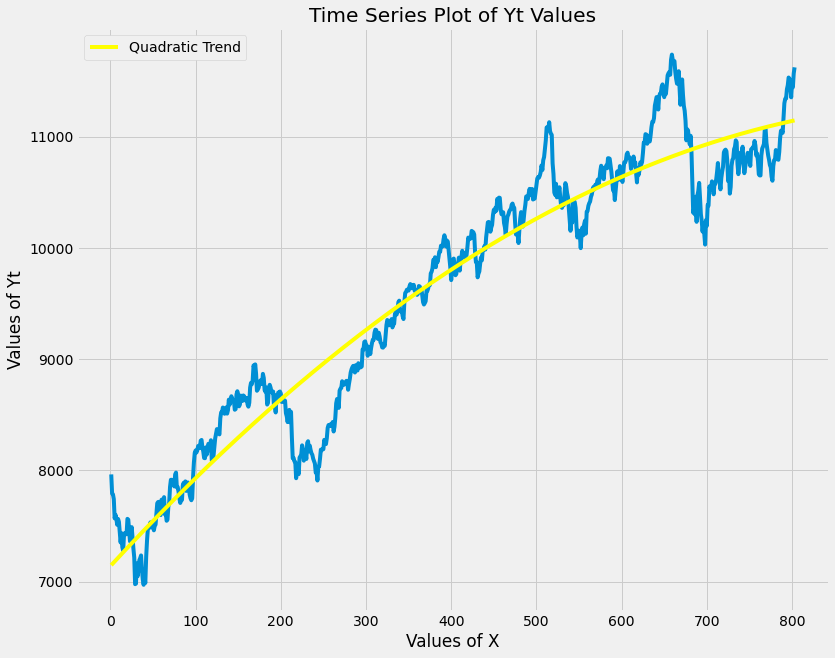

In [7]:
import numpy as np
import matplotlib.pyplot as plt

#lin_trend = np.poly1d(np.polyfit(nifty_df["x"],nifty_df["Close"], 1))
quad_trend = np.poly1d(np.polyfit(nifty_df["x"],nifty_df["Close"], 2))
myline = np.linspace(1, 803, 900)



# setting figure size to 12, 10
plt.figure(figsize=(12, 10))
 
# Labelling the axes and setting
# a title
plt.xlabel("Values of X")
plt.ylabel("Values of Yt")
plt.title("Time Series Plot of Yt Values")

plt.plot(nifty_df['x'],nifty_df['Close'])

#plt.plot(myline, lin_trend(myline), color = 'red', label = 'Linear Trend')

plt.plot(myline, quad_trend(myline), color = 'yellow', label = 'Quadratic Trend')

plt.legend(framealpha=1, frameon=True)

plt.show()

#quad_trend(5)

In [8]:
import pandas as pd 
#np.polyfit(nifty_df["x"],nifty_df["High Points"],2)
T_t = quad_trend(x)
detrended_value = yt_obs/T_t
detrended_value

list_of_tuple = list(zip(nifty_df['Time'],x,yt_obs, T_t,detrended_value))
df1 = pd.DataFrame(list_of_tuple, columns=["Time","x","yt_obs", "T_t","detrended_value"])
df1.head()

,Time,x,yt_obs,T_t,detrended_value
0,2016-01-01,1,7963.2,7147.066703,1.114191
1,2016-01-04,2,7791.3,7155.378966,1.088873
2,2016-01-05,3,7784.6,7163.682927,1.086676
3,2016-01-06,4,7741.0,7171.978586,1.079340
4,2016-01-07,5,7568.3,7180.265942,1.054042


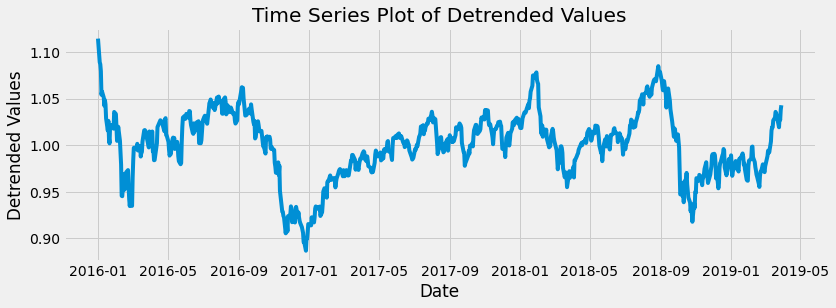

In [9]:
df1_time_index = df1.set_index("Time")
df1_time_index.head()
plt.figure(figsize=(12, 4))
 
# Labelling the axes and setting
# a title
plt.xlabel("Date")
plt.ylabel("Detrended Values")
plt.title("Time Series Plot of Detrended Values")
 

plt.plot(df1_time_index["detrended_value"])

In [10]:
df1['month'] = pd.DatetimeIndex(df1['Time']).month

unadjusted_si = df1.groupby(by="month")["detrended_value"].mean()
unadjusted_si
adjusted_si = unadjusted_si*(12/sum(unadjusted_si))
sum(adjusted_si)
adjusted_si

month
1     0.998553
2     0.981863
3     0.992144
4     0.995851
5     1.000563
6     1.009245
7     1.025298
8     1.036449
9     1.026425
10    0.989002
11    0.978519
12    0.966089
Name: detrended_value, dtype: float64

In [11]:
seasonal_indices = []
for j in range(len(df1["month"])):
    seasonal_indices.append(adjusted_si[df1["month"][j]]) 
df1["seasonal_indices"] = seasonal_indices
df1.head()

deseasonalized_values = detrended_value/seasonal_indices
print(deseasonalized_values)

0      1.115806
1      1.090451
2      1.088251
3      1.080904
4      1.055570
         ...   
798    1.027289
799    1.038803
800    1.035192
801    1.046336
802    1.051054
Name: Close, Length: 803, dtype: float64


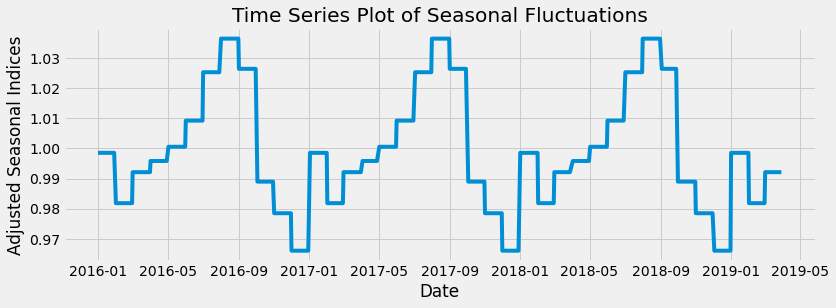

In [12]:
df1_after_seasonal = df1.set_index("Time")
df1_after_seasonal.head()
plt.figure(figsize=(12, 4))
 
# Labelling the axes and setting
# a title

plt.xlabel("Date")
plt.ylabel("Adjusted Seasonal Indices")
plt.title("Time Series Plot of Seasonal Fluctuations")
 

plt.plot(df1_after_seasonal["seasonal_indices"])

In [13]:
df1["deseasonalized_values"] = deseasonalized_values
df1.head()
#print(deseasonalized_values)

,Time,x,yt_obs,T_t,detrended_value,month,seasonal_indices,deseasonalized_values
0,2016-01-01,1,7963.2,7147.066703,1.114191,1,0.998553,1.115806
1,2016-01-04,2,7791.3,7155.378966,1.088873,1,0.998553,1.090451
2,2016-01-05,3,7784.6,7163.682927,1.086676,1,0.998553,1.088251
3,2016-01-06,4,7741.0,7171.978586,1.079340,1,0.998553,1.080904
4,2016-01-07,5,7568.3,7180.265942,1.054042,1,0.998553,1.055570


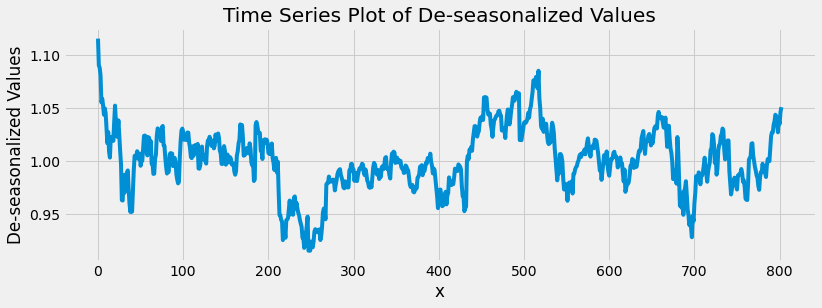

In [14]:
df1_deseasonal = df1.set_index("Time")
df1_deseasonal.head()
plt.figure(figsize=(12, 4))
 
# Labelling the axes and setting
# a title
plt.xlabel("x")
plt.ylabel("De-seasonalized Values")
plt.title("Time Series Plot of De-seasonalized Values")
 

plt.plot(df1["deseasonalized_values"])

562.0

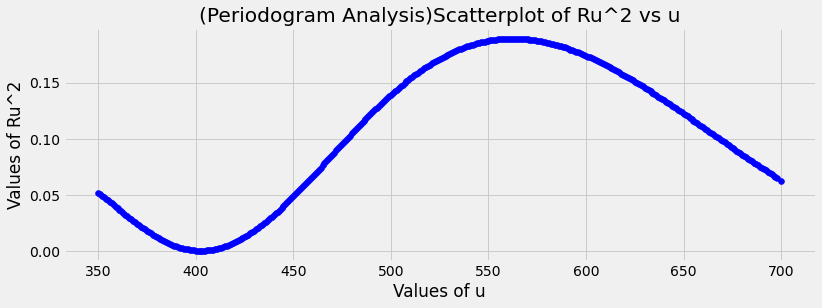

In [15]:
import math
ut = yt_obs/(T_t*seasonal_indices)
df1["ut"] = ut
df1.head()

u = np.floor(np.linspace(350,700,350))
u
A = []
B = []
for i in range(len(u)):
    A.append((2/len(ut))*sum(ut*np.cos((2*math.pi*x)/u[i])))
    B.append((2/len(ut))*sum(ut*np.sin((2*math.pi*x)/u[i])))
Ru_2 = np.square(A) + np.square(B)
Ru_2

plt.figure(figsize=(12, 4))
plt.xlabel("Values of u")
plt.ylabel("Values of Ru^2")
plt.title("(Periodogram Analysis)Scatterplot of Ru^2 vs u")

plt.scatter(u, Ru_2, c = "blue")

lamda = u[pd.Series(Ru_2).idxmax()]
lamda

562.0

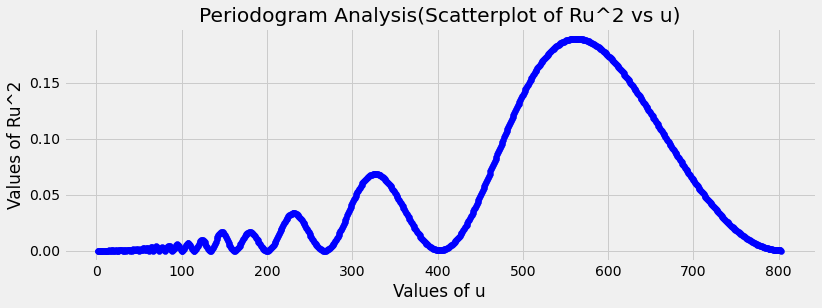

In [16]:
u_temp = np.floor(np.linspace(2,803,803))
u_temp
A = []
B = []
for i in range(len(u_temp)):
    A.append((2/len(ut))*sum(ut*np.cos((2*math.pi*x)/u_temp[i])))
    B.append((2/len(ut))*sum(ut*np.sin((2*math.pi*x)/u_temp[i])))
    
Ru_2 = np.square(A) + np.square(B)
Ru_2


plt.figure(figsize=(12, 4))
plt.xlabel("Values of u")
plt.ylabel("Values of Ru^2")
plt.title("Periodogram Analysis(Scatterplot of Ru^2 vs u)")
plt.scatter(u_temp, Ru_2, c = "blue")

lamda = u_temp[pd.Series(Ru_2).idxmax()]
lamda


In [17]:
float_array = (np.floor(np.linspace(2,400,400)))
float_array

Ru_2_new = Ru_2[float_array.astype(int)]

lamda_2nd = u_temp[pd.Series(Ru_2_new).idxmax()]
lamda_2nd 

326.0

In [18]:
lamda_geometric_mean = math.sqrt(lamda*lamda_2nd)
lamda_geometric_mean   #consider 428

428.0327090305132

In [19]:
import statistics as st
lamda = 428
#A0 = st.mean(ut)
#A_hat = (2/len(ut))*sum(ut*np.cos((2*math.pi*x)/lamda))
#B_hat = (2/len(ut))*sum(ut*np.sin((2*math.pi*x)/lamda))

cos_pred = np.cos((2*math.pi*x)/lamda)
sin_pred = np.sin((2*math.pi*x)/lamda)

df1["cos_pred"] = cos_pred
df1["sin_pred"] = sin_pred


from sklearn import linear_model

X_new = df1[['cos_pred', 'sin_pred']]
y_new = df1['ut']

regr = linear_model.LinearRegression()
regr.fit(X_new, y_new)

A0 = regr.intercept_
A_hat = regr.coef_[0]
B_hat = regr.coef_[1]
ut_hat = A0 + A_hat*cos_pred + B_hat*sin_pred
df1["ut_hat"] = ut_hat
df1.head()

,Time,x,yt_obs,T_t,detrended_value,month,seasonal_indices,deseasonalized_values,ut,cos_pred,sin_pred,ut_hat
0,2016-01-01,1,7963.2,7147.066703,1.114191,1,0.998553,1.115806,1.115806,0.999892,0.014680,1.013248
1,2016-01-04,2,7791.3,7155.378966,1.088873,1,0.998553,1.090451,1.090451,0.999569,0.029356,1.013483
2,2016-01-05,3,7784.6,7163.682927,1.086676,1,0.998553,1.088251,1.088251,0.999030,0.044027,1.013715
3,2016-01-06,4,7741.0,7171.978586,1.079340,1,0.998553,1.080904,1.080904,0.998276,0.058688,1.013944
4,2016-01-07,5,7568.3,7180.265942,1.054042,1,0.998553,1.055570,1.055570,0.997307,0.073336,1.014171


,Time,x,yt_obs,T_t,detrended_value,month,seasonal_indices,deseasonalized_values,ut,cos_pred,sin_pred,ut_hat
0,2016-01-01,1,7963.2,7147.066703,1.114191,1,0.998553,1.115806,1.115806,0.999892,0.014680,1.013248
1,2016-01-04,2,7791.3,7155.378966,1.088873,1,0.998553,1.090451,1.090451,0.999569,0.029356,1.013483
2,2016-01-05,3,7784.6,7163.682927,1.086676,1,0.998553,1.088251,1.088251,0.999030,0.044027,1.013715
3,2016-01-06,4,7741.0,7171.978586,1.079340,1,0.998553,1.080904,1.080904,0.998276,0.058688,1.013944
4,2016-01-07,5,7568.3,7180.265942,1.054042,1,0.998553,1.055570,1.055570,0.997307,0.073336,1.014171


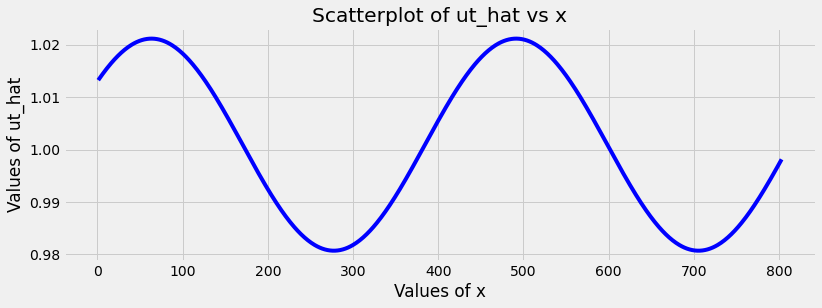

In [20]:
plt.figure(figsize=(12, 4))
plt.xlabel("Values of x")
plt.ylabel("Values of ut_hat")
plt.title("Scatterplot of ut_hat vs x")

plt.plot(x, ut_hat, c = "blue")

df1.head()

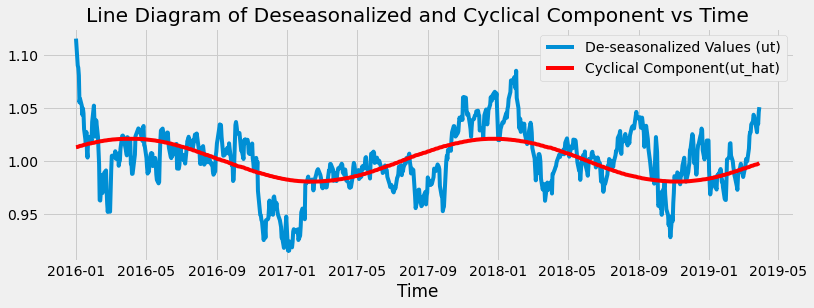

In [21]:
df1_harmonic = df1.set_index("Time")

plt.figure(figsize=(12, 4))
plt.xlabel("Time")
#plt.ylabel("Values of ut_hat")
plt.title("Line Diagram of Deseasonalized and Cyclical Component vs Time")


plt.plot(df1_harmonic["ut"], label = "De-seasonalized Values (ut)")
plt.plot(df1_harmonic["ut_hat"], c = "red", label = "Cyclical Component(ut_hat)")

plt.legend(framealpha=1, frameon=True)

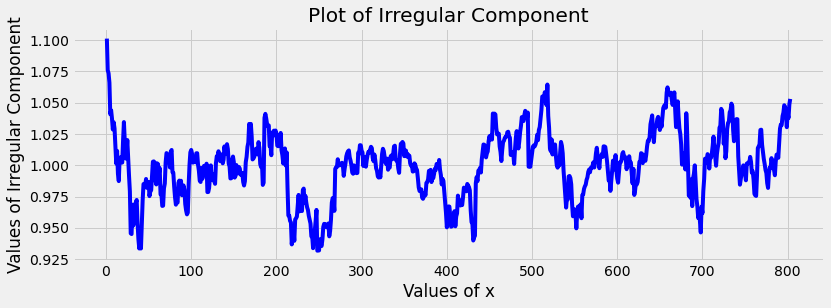

In [22]:
irregular = ut/ut_hat
irregular
df1["irregular"] = irregular
df1.head()
plt.figure(figsize=(12, 4))
plt.xlabel("Values of x")
plt.ylabel("Values of Irregular Component")
plt.title("Plot of Irregular Component")

plt.plot(x, irregular, c = "blue")

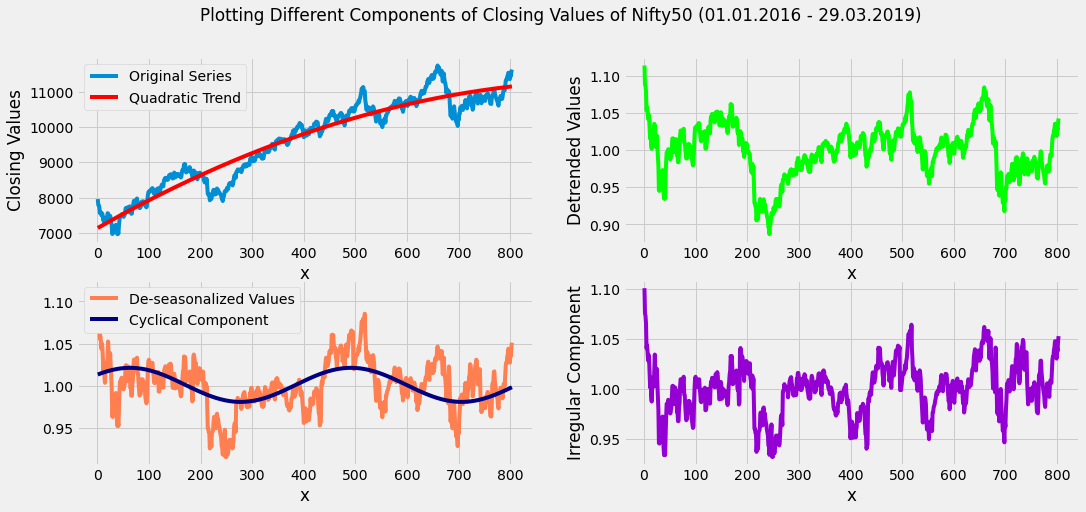

In [25]:
plt.figure(figsize=(16, 7))
plt.subplot(221)
plt.xlabel("x")
plt.ylabel("Closing Values")
#plt.title("Time Series Plot")
plt.plot(x, nifty_time["Close"], label = "Original Series")
plt.plot(myline, quad_trend(myline), color = 'red', label = 'Quadratic Trend')
plt.legend(framealpha=1, frameon=True)



plt.subplot(222)
plt.xlabel("x")
plt.ylabel("Detrended Values")
#plt.title("Time Series Plot of Detrended Values")
plt.plot(x, df1_time_index["detrended_value"], c = "lime")


plt.subplot(223)
plt.xlabel("x")
#plt.ylabel("Values of ut & ut_hat")
#plt.title("Line Diagram of Deseasonalized and Cyclical Component vs Time")
plt.plot(x,df1_harmonic["ut"], label = "De-seasonalized Values", c = "coral")
plt.plot(x, df1_harmonic["ut_hat"], c = "navy", label = "Cyclical Component")
plt.legend(framealpha=1, frameon=True)


plt.subplot(224)
plt.xlabel("x")
plt.ylabel("Irregular Component")
#plt.title("Plot of Irregular Component")
plt.plot(x, irregular, c = "darkviolet")



plt.suptitle("Plotting Different Components of Closing Values of Nifty50 (01.01.2016 - 29.03.2019)")
plt.show()


In [24]:
df1.head()


,Time,x,yt_obs,T_t,detrended_value,month,seasonal_indices,deseasonalized_values,ut,cos_pred,sin_pred,ut_hat,irregular
0,2016-01-01,1,7963.2,7147.066703,1.114191,1,0.998553,1.115806,1.115806,0.999892,0.014680,1.013248,1.101217
1,2016-01-04,2,7791.3,7155.378966,1.088873,1,0.998553,1.090451,1.090451,0.999569,0.029356,1.013483,1.075944
2,2016-01-05,3,7784.6,7163.682927,1.086676,1,0.998553,1.088251,1.088251,0.999030,0.044027,1.013715,1.073527
3,2016-01-06,4,7741.0,7171.978586,1.079340,1,0.998553,1.080904,1.080904,0.998276,0.058688,1.013944,1.066039
4,2016-01-07,5,7568.3,7180.265942,1.054042,1,0.998553,1.055570,1.055570,0.997307,0.073336,1.014171,1.040821


In [26]:
train_data = df1[:784]
#display(train_data)

test_data = df1[784:]
display(test_data)

,Time,x,yt_obs,T_t,detrended_value,month,seasonal_indices,deseasonalized_values,ut,cos_pred,sin_pred,ut_hat,irregular
784,2019-03-01,785,10863.50,11115.660925,0.977315,3,0.992144,0.985054,0.985054,0.504232,-0.863568,0.992988,0.992010
785,2019-03-05,786,10987.45,11117.464324,0.988305,3,0.992144,0.996131,0.996131,0.516855,-0.856073,0.993262,1.002889
786,2019-03-06,787,11053.00,11119.259422,0.994041,3,0.992144,1.001912,1.001912,0.529366,-0.848394,0.993538,1.008429
787,2019-03-07,788,11058.20,11121.046217,0.994349,3,0.992144,1.002223,1.002223,0.541763,-0.840531,0.993815,1.008460
788,2019-03-08,789,11035.40,11122.824711,0.992140,3,0.992144,0.999996,0.999996,0.554044,-0.832488,0.994094,1.005937
789,2019-03-11,790,11168.05,11124.594902,1.003906,3,0.992144,1.011856,1.011856,0.566205,-0.824265,0.994375,1.017580
790,2019-03-12,791,11301.20,11126.356791,1.015714,3,0.992144,1.023757,1.023757,0.578244,-0.815864,0.994657,1.029257
791,2019-03-13,792,11341.70,11128.110378,1.019194,3,0.992144,1.027264,1.027264,0.590158,-0.807288,0.994940,1.032489
792,2019-03-14,793,11343.25,11129.855662,1.019173,3,0.992144,1.027244,1.027244,0.601945,-0.798537,0.995225,1.032172
793,2019-03-15,794,11426.85,11131.592645,1.026524,3,0.992144,1.034653,1.034653,0.613603,-0.789615,0.995511,1.039319


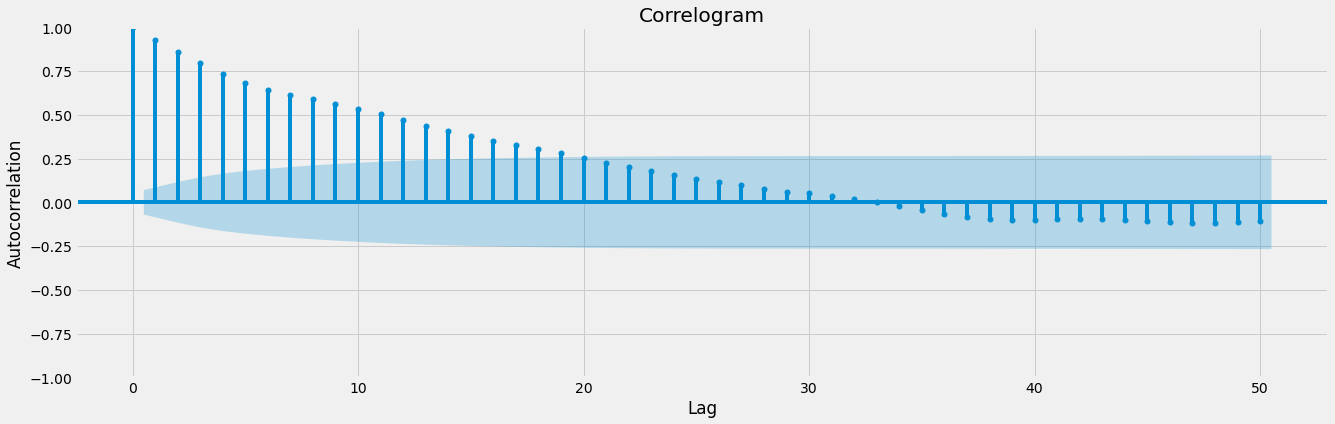

In [27]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf

fig, ax = plt.subplots(figsize=(20, 6))
plot_acf(train_data["irregular"], lags=50, ax=ax)

# Set plot labels and title
ax.set_xlabel('Lag')
ax.set_ylabel('Autocorrelation')
ax.set_title('Correlogram')

# Show the plot
plt.show()

In [32]:
#df1.to_csv('output.csv', index= True)

In [28]:
model = sm.tsa.AutoReg(train_data["irregular"], lags=15, trend='n')
result = model.fit()
#print(result.summary())
AR1_values = result.fittedvalues

forecast_ar = result.predict(start=len(train_data["irregular"]), end=len(train_data["irregular"]) + 18)
#print(forecast_ar)

In [28]:
len(AR1_values)


769

In [187]:
len(AR1_values)
AR1_values
Ar_ax = np.floor(np.linspace(11,803,793))
len(Ar_ax)

793

,Time,x,yt_obs,T_t,detrended_value,month,seasonal_indices,deseasonalized_values,ut,cos_pred,sin_pred,ut_hat,irregular
0,2016-01-01,1,7963.20,7147.066703,1.114191,1,0.998553,1.115806,1.115806,0.999892,0.014680,1.013248,1.101217
1,2016-01-04,2,7791.30,7155.378966,1.088873,1,0.998553,1.090451,1.090451,0.999569,0.029356,1.013483,1.075944
2,2016-01-05,3,7784.60,7163.682927,1.086676,1,0.998553,1.088251,1.088251,0.999030,0.044027,1.013715,1.073527
3,2016-01-06,4,7741.00,7171.978586,1.079340,1,0.998553,1.080904,1.080904,0.998276,0.058688,1.013944,1.066039
4,2016-01-07,5,7568.30,7180.265942,1.054042,1,0.998553,1.055570,1.055570,0.997307,0.073336,1.014171,1.040821
...,...,...,...,...,...,...,...,...,...,...,...,...,...
779,2019-02-22,780,10791.65,11106.519395,0.971650,2,0.981863,0.989598,0.989598,0.439544,-0.898221,0.991643,0.997938
780,2019-02-25,781,10880.10,11108.364305,0.979451,2,0.981863,0.997543,0.997543,0.452682,-0.891672,0.991908,1.005681
781,2019-02-26,782,10835.30,11110.200913,0.975257,2,0.981863,0.993272,0.993272,0.465723,-0.884931,0.992175,1.001105
782,2019-02-27,783,10806.65,11112.029219,0.972518,2,0.981863,0.990482,0.990482,0.478663,-0.877999,0.992444,0.998023


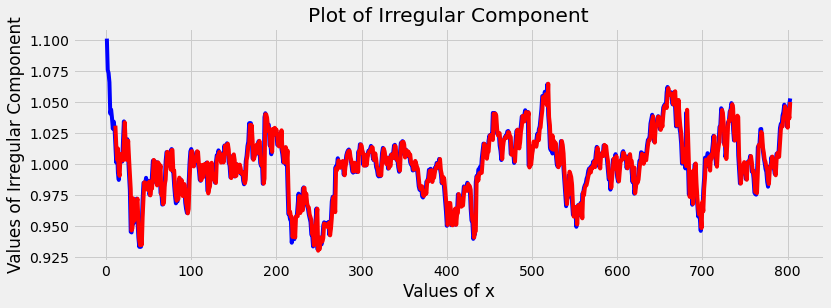

In [188]:
plt.figure(figsize=(12, 4))
plt.xlabel("Values of x")
plt.ylabel("Values of Irregular Component")
plt.title("Plot of Irregular Component")

plt.plot(x, irregular, c = "blue")
plt.plot(Ar_ax, AR1_values, c = "red")
display(train_data)

In [104]:
#from statsmodels.tsa.api import SimpleExpSmoothing
#from sklearn.metrics import mean_squared_error

#smoothing_levels = np.linspace(0.1,0.9,100)
#sse_array = []

#best_alpha = None
#best_mse = float('inf')

# Calculate SSE for different smoothing levels
#for level in smoothing_levels:
 #   model = SimpleExpSmoothing(irregular)
 #   fitted_model = model.fit(smoothing_level=level)
 #   fitted_values = fitted_model.fittedvalues
   
 #   sse = ((fitted_values - irregular) ** 2).sum()
 #   sse_array.append(sse)
 #   mse = mean_squared_error(irregular, fitted_values)
 #   if mse < best_mse:
 #       best_alpha = level
 #       best_mse = mse
   
    #print("Smoothing Level:", level)
    #print("Error Sum of Squares (SSE):", sse)
    #print()
#best_alpha

In [30]:
from statsmodels.tsa.api import SimpleExpSmoothing
from sklearn.metrics import mean_squared_error

smoothing_levels = np.linspace(0.1,0.3,100)
sse_array = []

best_alpha = None
best_mse = float('inf')

# Calculate SSE for different smoothing levels
for level in smoothing_levels:
    model = SimpleExpSmoothing(train_data["irregular"])
    fitted_model = model.fit(smoothing_level=level)
    
    predictions = fitted_model.forecast(1)
    mse = (test_data["irregular"].iloc[0] - predictions)**2
    
    if mse.iloc[0] < best_mse:
        best_alpha = level
        best_mse = mse.iloc[0]
   
    #print("Smoothing Level:", level)
    #print("Error Sum of Squares (SSE):", sse)
    #print()
best_alpha

0.295959595959596

In [31]:
from statsmodels.tsa.api import SimpleExpSmoothing

final_model_simp_exp = SimpleExpSmoothing(train_data["irregular"])
fitted_model_simp_exp = final_model_simp_exp.fit(smoothing_level = best_alpha)  # Adjust smoothing level as desired

# Obtain the fitted values and forecast for the next period
fitted_values_simp_exp = fitted_model_simp_exp.fittedvalues

# Print the fitted values and forecast
#print("Fitted Values:")
#print(fitted_values)

#sse = ((fitted_values - irregular) ** 2).sum()
#print("SSE:")
#print(sse)
print(fitted_model_simp_exp.summary())
fitted_values_simp_exp

                       SimpleExpSmoothing Model Results                       
Dep. Variable:              irregular   No. Observations:                  784
Model:             SimpleExpSmoothing   SSE                              0.113
Optimized:                       True   AIC                          -6931.833
Trend:                           None   BIC                          -6922.505
Seasonal:                        None   AICC                         -6931.782
Seasonal Periods:                None   Date:                 Mon, 17 Jul 2023
Box-Cox:                        False   Time:                         12:02:28
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.2959596                alpha                False
initial_level              1.0718409                

0      1.071841
1      1.080535
2      1.079176
3      1.077504
4      1.074111
         ...   
779    0.994431
780    0.995469
781    0.998491
782    0.999265
783    0.998897
Length: 784, dtype: float64

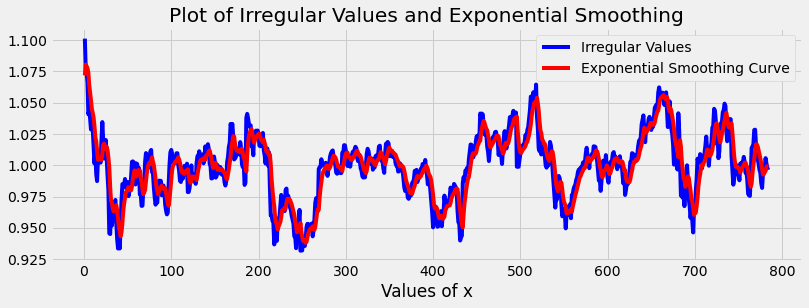

In [33]:
plt.figure(figsize=(12, 4))
plt.xlabel("Values of x")
#plt.ylabel("Values of Irregular Component")
plt.title("Plot of Irregular Values and Exponential Smoothing")

plt.plot(train_data["x"], train_data["irregular"], c = "blue", label = "Irregular Values")
plt.plot(train_data["x"], fitted_values_simp_exp, c = "red", label = "Exponential Smoothing Curve")
plt.legend(framealpha=1, frameon=True)

In [34]:
test_predictions = fitted_model_simp_exp.forecast(19)
#mse = mean_squared_error(test_data['irregular'], test_predictions)
#print(mse)
#print(test_predictions)
#fitted_model_simp_exp.fittedvalues.forecast(10)
test_predictions
forecast_simexp = test_predictions

In [35]:
display(train_data)
display(test_data)

,Time,x,yt_obs,T_t,detrended_value,month,seasonal_indices,deseasonalized_values,ut,cos_pred,sin_pred,ut_hat,irregular
0,2016-01-01,1,7963.20,7147.066703,1.114191,1,0.998553,1.115806,1.115806,0.999892,0.014680,1.013248,1.101217
1,2016-01-04,2,7791.30,7155.378966,1.088873,1,0.998553,1.090451,1.090451,0.999569,0.029356,1.013483,1.075944
2,2016-01-05,3,7784.60,7163.682927,1.086676,1,0.998553,1.088251,1.088251,0.999030,0.044027,1.013715,1.073527
3,2016-01-06,4,7741.00,7171.978586,1.079340,1,0.998553,1.080904,1.080904,0.998276,0.058688,1.013944,1.066039
4,2016-01-07,5,7568.30,7180.265942,1.054042,1,0.998553,1.055570,1.055570,0.997307,0.073336,1.014171,1.040821
...,...,...,...,...,...,...,...,...,...,...,...,...,...
779,2019-02-22,780,10791.65,11106.519395,0.971650,2,0.981863,0.989598,0.989598,0.439544,-0.898221,0.991643,0.997938
780,2019-02-25,781,10880.10,11108.364305,0.979451,2,0.981863,0.997543,0.997543,0.452682,-0.891672,0.991908,1.005681
781,2019-02-26,782,10835.30,11110.200913,0.975257,2,0.981863,0.993272,0.993272,0.465723,-0.884931,0.992175,1.001105
782,2019-02-27,783,10806.65,11112.029219,0.972518,2,0.981863,0.990482,0.990482,0.478663,-0.877999,0.992444,0.998023


,Time,x,yt_obs,T_t,detrended_value,month,seasonal_indices,deseasonalized_values,ut,cos_pred,sin_pred,ut_hat,irregular
784,2019-03-01,785,10863.50,11115.660925,0.977315,3,0.992144,0.985054,0.985054,0.504232,-0.863568,0.992988,0.992010
785,2019-03-05,786,10987.45,11117.464324,0.988305,3,0.992144,0.996131,0.996131,0.516855,-0.856073,0.993262,1.002889
786,2019-03-06,787,11053.00,11119.259422,0.994041,3,0.992144,1.001912,1.001912,0.529366,-0.848394,0.993538,1.008429
787,2019-03-07,788,11058.20,11121.046217,0.994349,3,0.992144,1.002223,1.002223,0.541763,-0.840531,0.993815,1.008460
788,2019-03-08,789,11035.40,11122.824711,0.992140,3,0.992144,0.999996,0.999996,0.554044,-0.832488,0.994094,1.005937
789,2019-03-11,790,11168.05,11124.594902,1.003906,3,0.992144,1.011856,1.011856,0.566205,-0.824265,0.994375,1.017580
790,2019-03-12,791,11301.20,11126.356791,1.015714,3,0.992144,1.023757,1.023757,0.578244,-0.815864,0.994657,1.029257
791,2019-03-13,792,11341.70,11128.110378,1.019194,3,0.992144,1.027264,1.027264,0.590158,-0.807288,0.994940,1.032489
792,2019-03-14,793,11343.25,11129.855662,1.019173,3,0.992144,1.027244,1.027244,0.601945,-0.798537,0.995225,1.032172
793,2019-03-15,794,11426.85,11131.592645,1.026524,3,0.992144,1.034653,1.034653,0.613603,-0.789615,0.995511,1.039319


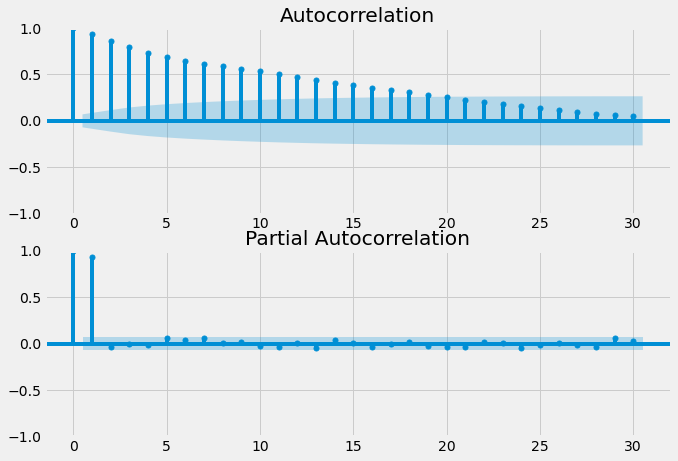

In [37]:
import statsmodels.api as sm
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 7))
sm.graphics.tsa.plot_acf(train_data["irregular"], ax=ax1, lags=30)
sm.graphics.tsa.plot_pacf(train_data["irregular"], ax=ax2, lags=30,  method='ywm')
plt.show()

In [50]:
plt.figure(figsize=(12, 4))

import statsmodels.api as sm
model_arima = sm.tsa.ARIMA(train_data["irregular"], order=(15, 0, 1))  # ARIMA(p, d, q) where d=0 for ARMA model
results_arima = model_arima.fit(method_kwargs={'maxiter': 4000})
fitted_values_arima = results_arima.fittedvalues
#print(fitted_values_arima)

est_residual_train = fitted_values_arima

est_yt_train = train_data["T_t"]*train_data["seasonal_indices"]*train_data["ut_hat"]*est_residual_train
#print(est_residual_train)
#print(est_yt_train)

<Figure size 864x288 with 0 Axes>

In [51]:
model = sm.tsa.AutoReg(train_data["irregular"], lags=15, trend='n')
result = model.fit()
#print(result.summary())
AR1_values = result.fittedvalues

forecast_ar = result.predict(start=len(train_data["irregular"]), end=len(train_data["irregular"]) + 18)
#print(forecast_ar)

In [52]:
forecast_start = len(train_data["irregular"])
forecast_end = forecast_start + 18  # Adjust the forecast horizon as needed
forecast = results_arima.predict(start=forecast_start, end=forecast_end)
#print(forecast)

est_residual_test = forecast
est_yt_test = test_data["T_t"]*test_data["seasonal_indices"]*test_data["ut_hat"]*est_residual_test
est_yt_test_ar = test_data["T_t"]*test_data["seasonal_indices"]*test_data["ut_hat"]*forecast_ar
est_yt_test_simexp = test_data["T_t"]*test_data["seasonal_indices"]*test_data["ut_hat"]*forecast_simexp

2      1.073527
3      1.066039
4      1.040821
5      1.043925
6      1.037355
         ...   
779    0.997938
780    1.005681
781    1.001105
782    0.998023
783    0.996281
Name: irregular, Length: 782, dtype: float64


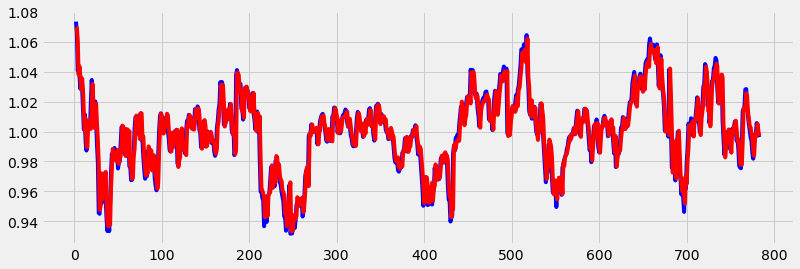

In [53]:
plt.figure(figsize=(12, 4))
plt.plot((train_data["irregular"])[2:], color = "blue")
plt.plot(fitted_values_arima[2:], color = "red")

#plt.plot(fitted_values_arima, color = "red")
print((train_data["irregular"])[2:])

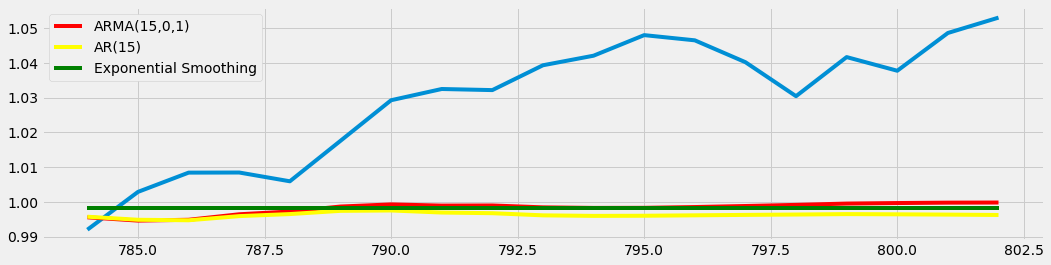

In [54]:
plt.figure(figsize=(16, 4))
plt.plot(test_data["irregular"])
plt.plot(forecast, color = "red", label = "ARMA(15,0,1)")
plt.plot(forecast_ar, color = "yellow", label = "AR(15)")
plt.plot(forecast_simexp, color = "green", label = "Exponential Smoothing")
plt.legend(framealpha=1, frameon=True)

plt.show()

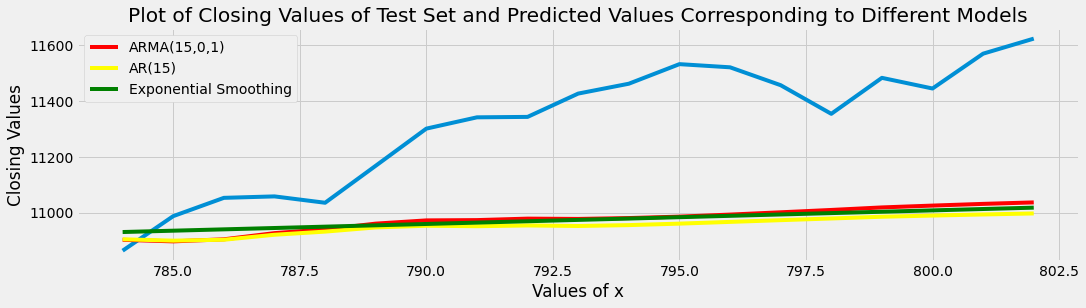

2843929.9073277996
3208016.0469614165
2949147.459626207


In [55]:
plt.figure(figsize=(16, 4))
plt.xlabel("Values of x")
plt.ylabel("Closing Values")
plt.title("Plot of Closing Values of Test Set and Predicted Values Corresponding to Different Models")

plt.plot(test_data["yt_obs"])
plt.plot(est_yt_test, color = "red", label = "ARMA(15,0,1)")
plt.plot(est_yt_test_ar, color = "yellow", label = "AR(15)")
plt.plot(est_yt_test_simexp, color = "green", label = "Exponential Smoothing")

plt.legend(framealpha=1, frameon=True)
plt.show()

test_error_arma = sum(np.square(test_data["yt_obs"] - est_yt_test))
print(test_error_arma)

test_error_ar = sum(np.square(test_data["yt_obs"] - est_yt_test_ar))
print(test_error_ar)

test_error_simexp = sum(np.square(test_data["yt_obs"] - est_yt_test_simexp))
print(test_error_simexp)
